In [ ]:
!pip install torch pyro-ppl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install ucimlrepo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.infer.autoguide import AutoDiagonalNormal
from torch.distributions import constraints
import numpy as np

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

In [ ]:
X.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [ ]:
y.head(5)

,class
0,1
1,2
2,1
3,1
4,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']:
    X[column] = label_encoder.fit_transform(X[column])

<ipython-input-138-404f84c73581>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-138-404f84c73581>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-138-404f84c73581>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
X.head(10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0
5,3,36,2,7,9055,4,2,2,2,0,4,3,35,2,2,1,1,2,1,0
6,3,24,2,3,2835,2,4,3,2,0,4,1,53,2,1,1,2,1,0,0
7,1,36,2,1,6948,0,2,2,2,0,2,2,35,2,0,1,3,1,1,0
8,3,12,2,4,3059,3,3,2,0,0,4,0,61,2,1,1,1,1,0,0
9,1,30,4,0,5234,0,0,4,3,0,2,2,28,2,1,2,3,1,0,0


In [ ]:
y['class'] = y['class'].apply(lambda x: 1 if x > 1 else 0)

<ipython-input-140-07d930794fb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].apply(lambda x: 1 if x > 1 else 0)


In [ ]:
y.head(5)

,class
0,0
1,1
2,0
3,0
4,1


In [ ]:
y_ = y['class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_clean, X_test, y_train, y_test = train_test_split(X_scaled, y_, test_size=0.2, random_state=42)

In [ ]:
X_clean = torch.tensor(X_clean, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

# Add Noise

In [ ]:
def add_noise_to_data(X, noise_factor=0.8, outlier_fraction = 0.1, outlier_scale=5):
    noise = noise_factor * torch.randn_like(X)
    X_noisy = X + noise
    X_noisy = torch.clamp(X_noisy, 0, 1)

    num_outliers = int(outlier_fraction * X.shape[0])  # Determine number of outlier points
    outlier_indices = torch.randint(0, X.shape[0], (num_outliers,))  # Randomly select outlier positions
    X_outliers = torch.randn_like(X[outlier_indices]) * outlier_scale  # Scale up for extreme values
    X_noisy[outlier_indices] = X_outliers
    return X_noisy

X_train = add_noise_to_data(X_clean, noise_factor = 0.8, outlier_fraction=0.05)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([800, 20])
X_test shape: torch.Size([200, 20])
y_train shape: torch.Size([800])
y_test shape: torch.Size([200])


In [ ]:
pyro.clear_param_store()

In [ ]:
def model_MVN(X, y):
    w_prior = dist.MultivariateNormal(torch.zeros(X.shape[1]), torch.eye(X.shape[1]))  # Multivariate Normal for weights
    b_prior = dist.Normal(0., 1.)  # Normal prior for the bias

    # Sample weights and bias from the priors
    w = pyro.sample('w_MVN', w_prior)
    b = pyro.sample('b_MVN', b_prior)

    # Linear model: w * X + b
    logits = torch.matmul(X, w) + b
    probs = torch.sigmoid(logits)  # Sigmoid activation for binary classification

    # Likelihood: Bernoulli distribution for the binary target
    with pyro.plate('data', X.shape[0]):  # Plate to represent the batch dimension
        pyro.sample('obs', dist.Bernoulli(probs), obs=y)


def guide_MVN(X, y):
    # Define variational parameters for the weights and bias
    # Variational parameters for weights and bias
    w_loc = pyro.param('w_loc_MVN', torch.randn(X.shape[1]))  # Mean of variational distribution for weights
    w_scale = pyro.param('w_scale_MVN', torch.ones(X.shape[1]), constraint=torch.distributions.constraints.positive)  # Scale of variational distribution for weights
    b_loc = pyro.param('b_loc_MVN', torch.randn(1))  # Mean of variational distribution for bias
    b_scale = pyro.param('b_scale_MVN', torch.ones(1), constraint=torch.distributions.constraints.positive)  # Scale of variational distribution for bias

    # Variational distribution for the weights: Multivariate Normal
    # Using a diagonal covariance matrix for the variational distribution (for simplicity)
    w_cov = torch.diag(w_scale)  # Covariance matrix for the variational distribution
    pyro.sample('w_MVN', dist.MultivariateNormal(w_loc, w_cov))  # Multivariate Normal for weights

    # Variational distribution for the bias
    pyro.sample('b_MVN', dist.Normal(b_loc, b_scale))  # Normal for bias


# Optimizer setup
adam_params = {"lr": 0.01}
optimizer = pyro.optim.Adam(adam_params)

# SVI setup
svi_MVN = SVI(model_MVN, guide_MVN, optimizer, loss=Trace_ELBO())

# Train the model with Stochastic Variational Inference (SVI)
num_steps = 5000
for step in range(num_steps):
    loss = svi_MVN.step(X_train, y_train)
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss}")


Step 0, Loss: 2525.9318068027496
Step 100, Loss: 1010.6015226840973
Step 200, Loss: 1063.9779847860336
Step 300, Loss: 866.0896145105362
Step 400, Loss: 943.9516309499741
Step 500, Loss: 819.6888732910156
Step 600, Loss: 880.0960279107094
Step 700, Loss: 784.4818916916847
Step 800, Loss: 720.8565518856049
Step 900, Loss: 684.2007480859756
Step 1000, Loss: 585.403254032135
Step 1100, Loss: 621.5580959916115
Step 1200, Loss: 554.1374578475952
Step 1300, Loss: 565.4094987511635
Step 1400, Loss: 554.277835726738
Step 1500, Loss: 551.7180306315422
Step 1600, Loss: 534.5765124559402
Step 1700, Loss: 534.4498436450958
Step 1800, Loss: 606.6603792905807
Step 1900, Loss: 530.7692085504532
Step 2000, Loss: 524.3758540153503
Step 2100, Loss: 526.5653847455978
Step 2200, Loss: 527.364582657814
Step 2300, Loss: 538.1526571512222
Step 2400, Loss: 529.5109384059906
Step 2500, Loss: 522.0219465494156
Step 2600, Loss: 534.5642477273941
Step 2700, Loss: 545.7636140584946
Step 2800, Loss: 524.86225986480

In [ ]:
def model_T(X, y):
    # Define priors
    df = pyro.sample("df", dist.Gamma(2.0, 1.0))
    w_prior = dist.StudentT(df=df, loc=torch.zeros(X.shape[1]), scale=torch.ones(X.shape[1]))
    b_prior = dist.StudentT(df=df, loc=torch.zeros(1), scale=torch.ones(1))

    # Sample weights and bias from the priors
    w = pyro.sample('w_T', w_prior.to_event(1))
    b = pyro.sample('b_T', b_prior)

    # Linear model: w * X + b
    logits = torch.matmul(X, w) + b
    probs = torch.sigmoid(logits)

    # Likelihood: Bernoulli distribution for the binary target
    with pyro.plate('data', X.shape[0]):
        pyro.sample('obs', dist.Bernoulli(probs), obs=y)



def guide_T(X, y):
    # Define variational parameters for the weights and bias
    df_loc = pyro.param("df_loc", torch.tensor(2.0), constraint=dist.constraints.positive)
    w_loc = pyro.param('w_loc_T', torch.randn(X.shape[1]))
    w_scale = pyro.param('w_scale_T', torch.ones(X.shape[1]), constraint=torch.distributions.constraints.positive)
    b_loc = pyro.param('b_loc_T', torch.randn(1))
    b_scale = pyro.param('b_scale_T', torch.ones(1), constraint=torch.distributions.constraints.positive)

    # Variational distributions for the weights and bias
    pyro.sample("df", dist.Gamma(df_loc, torch.tensor(1.0)))
    pyro.sample('w_T', dist.StudentT(df=df_loc, loc=w_loc, scale=w_scale).to_event(1))
    pyro.sample('b_T', dist.StudentT(df=df_loc, loc=b_loc, scale=b_scale))



adam_params = {"lr": 0.01}
optimizer = pyro.optim.Adam(adam_params)

# SVI setup
svi_T = SVI(model_T, guide_T, optimizer, loss=Trace_ELBO())
# Train the model with Stochastic Variational Inference (SVI)
num_steps = 5000
for step in range(num_steps):
    loss = svi_T.step(X_train, y_train)
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss}")

Step 0, Loss: 2636.2747650146484
Step 100, Loss: 1195.8585216999054
Step 200, Loss: 1145.5281627774239
Step 300, Loss: 886.8360206484795
Step 400, Loss: 772.9640584588051
Step 500, Loss: 664.0916870832443
Step 600, Loss: 676.715829949826
Step 700, Loss: 607.093477666378
Step 800, Loss: 620.4852980971336
Step 900, Loss: 579.4924142360687
Step 1000, Loss: 578.5524078309536
Step 1100, Loss: 555.2747754454613
Step 1200, Loss: 573.4056774377823
Step 1300, Loss: 566.9104006290436
Step 1400, Loss: 531.2674360871315
Step 1500, Loss: 530.0637589991093
Step 1600, Loss: 533.5501674413681
Step 1700, Loss: 548.4080648124218
Step 1800, Loss: 556.9594882726669
Step 1900, Loss: 525.8874227404594
Step 2000, Loss: 537.5951880514622
Step 2100, Loss: 530.3805029392242
Step 2200, Loss: 523.2449925541878
Step 2300, Loss: 535.2379443049431
Step 2400, Loss: 518.5163588523865
Step 2500, Loss: 523.6775804758072
Step 2600, Loss: 537.3014307022095
Step 2700, Loss: 525.1469570398331
Step 2800, Loss: 523.1701930761

In [ ]:
T_df_param = pyro.param("df_loc").detach().item()
T_scale_param_tensor = pyro.param('w_scale_T').detach()
T_mean_param_tensor = pyro.param('w_loc_T').detach()
T_bias_mean_param = pyro.param('b_loc_T').detach()
T_bias_scale_param = pyro.param('b_scale_T').detach()
MVN_scale_param_tensor = pyro.param('w_scale_MVN').detach()
MVN_mean_param_tensor = pyro.param('w_loc_MVN').detach()
MVN_bias_mean_param = pyro.param('b_loc_MVN').detach()
MVN_bias_scale_param = pyro.param('b_scale_MVN').detach()
r = np.diag(T_scale_param_tensor.numpy())

In [ ]:
r.shape

(20, 20)

In [ ]:
vi_posterior_t = [dist.StudentT(pyro.param("df_loc").detach().item(), pyro.param('w_loc_T').detach()[i], pyro.param('w_scale_T').detach()[i])for i in range(20)]
vi_posterior = dist.MultivariateNormal(loc = pyro.param('w_loc_MVN').detach(), covariance_matrix= torch.diag(pyro.param('w_scale_MVN').detach()))

# Pseudo BMA and Stacking for optimal weights

In [ ]:
import arviz as az
import pymc as pm

In [ ]:
rng = np.random.seed(2741)

In [ ]:
# Model 1: Multivariate Normal
with pm.Model() as model_mvnorm:
    # Priors (extracting from vi_posterior)
    intercept = pm.Normal('intercept', mu= MVN_bias_mean_param.numpy()[0], sigma= MVN_bias_scale_param.numpy()[0])
    coefs = pm.MvNormal('coefs', mu=vi_posterior.loc[0:].numpy(), cov=vi_posterior.covariance_matrix[:, :].numpy())


    # Logistic regression
    logits = pm.invlogit(intercept + pm.math.dot(X_train.numpy(), coefs))
    likelihood = pm.Bernoulli('likelihood', logit_p=logits, observed=y_train.numpy())

    idata_0 = pm.sample(draws=2000, tune=1000, target_accept=0.99, idata_kwargs={"log_likelihood": True}, random_seed=rng)
    pm.sample_posterior_predictive(idata_0, extend_inferencedata=True, random_seed=rng)

Output()

Output()

array([[<Axes: title={'center': 'coefs'}>,
        <Axes: title={'center': 'coefs'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

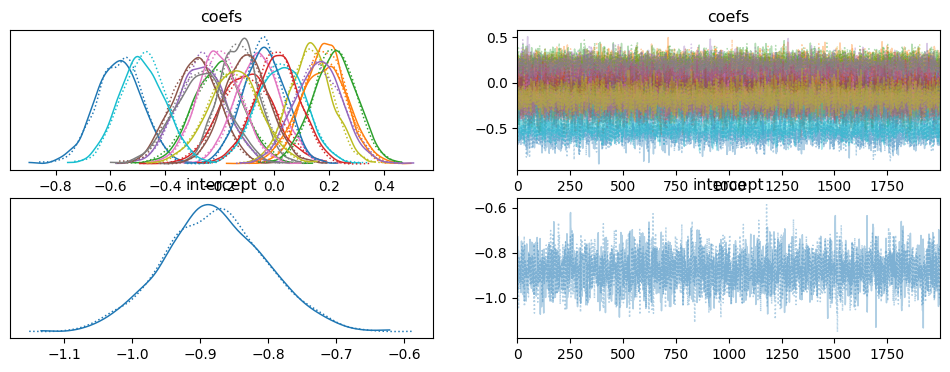

In [ ]:
pm.plot_trace(idata_0)

In [ ]:
# Model 2: Student T
with pm.Model() as model_studentt:
    # Priors (extracting from vi_posterior_t)
    intercept = pm.StudentT('intercept', mu= T_bias_mean_param.numpy()[0], sigma= T_bias_scale_param.numpy()[0], nu=T_df_param)
    coefs = pm.MvStudentT("coefs",mu=T_mean_param_tensor.numpy(),scale=r,nu=T_df_param)

    # Logistic regression
    logits = pm.invlogit(intercept + pm.math.dot(X_train.numpy(), coefs))
    likelihood = pm.Bernoulli('likelihood', logit_p=logits, observed=y_train.numpy())

    idata_1 = pm.sample(draws=2000, tune=1000, target_accept=0.99, idata_kwargs={"log_likelihood": True}, random_seed=rng)
    pm.sample_posterior_predictive(idata_1, extend_inferencedata=True, random_seed=rng)


Output()

Output()

array([[<Axes: title={'center': 'coefs'}>,
        <Axes: title={'center': 'coefs'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

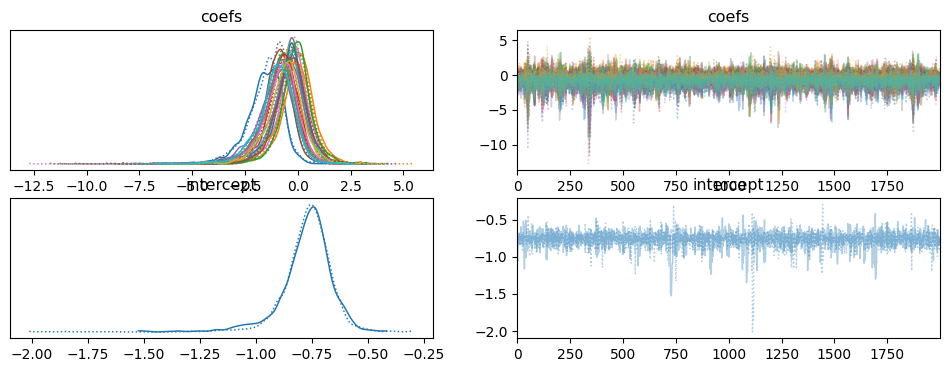

In [ ]:
pm.plot_trace(idata_1)

In [ ]:
model_dict = dict(zip(["model_mvnorm", "model_studentt"], [idata_0, idata_1]))
comp = az.compare(model_dict, method = "BB-pseudo-BMA")
comp

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1045: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more lik

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_studentt,0,-563.238792,2.297840,0.000000,1.000000e+00,2.012175,0.000000,True,log
model_mvnorm,1,-585.211453,0.665582,21.972661,3.061217e-09,3.115531,2.374896,True,log


# Test Accuracy

In [ ]:
def predict_testset(X, num_samples=4000, w1=comp.loc['model_studentt', 'weight'], w2=comp.loc['model_mvnorm', 'weight']):
    # Student-T parameters
    df_loc = T_df_param
    w_loc_T = pyro.param('w_loc_T')
    w_scale_T = pyro.param('w_scale_T')
    b_loc_T = pyro.param('b_loc_T')

    # MVN parameters
    w_loc_MVN = pyro.param('w_loc_MVN')
    w_cov_MVN = torch.diag(pyro.param('w_scale_MVN'))
    b_loc_MVN = pyro.param('b_loc_MVN')
    b_scale_MVN = pyro.param('b_scale_MVN')

    # Sample mixture components
    mix_component = torch.bernoulli(torch.full((num_samples,), w1))  # Choose component
    mix_component_copy = mix_component.clone()

    # Sample weights directly from mixture model
    w_samples = torch.where(
        mix_component[:, None] == 1,
        dist.StudentT(df=df_loc, loc=w_loc_T, scale=w_scale_T).sample((num_samples,)),
        dist.MultivariateNormal(w_loc_MVN, w_cov_MVN).sample((num_samples,))
    )


    b_T_samples = dist.StudentT(df=df_loc, loc=b_loc_T, scale=torch.ones(1)).sample((num_samples,))
    b_MVN_samples = dist.Normal(b_loc_MVN, b_scale_MVN).sample((num_samples,))
    b_samples = torch.where(mix_component_copy[:, None] == 1, b_T_samples, b_MVN_samples)  # Ensure shape remains (2000,)

    # Compute logits
    logits = torch.matmul(X, w_samples.T) + b_samples.T
    probs = torch.sigmoid(logits).mean(dim=1)  # Average predictions

    return (probs > 0.5).float()  # Return binary predictions

In [ ]:
y_pred = predict_testset(X_test)
accuracy = (y_pred == y_test).float().mean()
print(f"Accuracy: {accuracy.item() * 100:.4f}%")

Accuracy: 74.0000%


In [ ]:
def predict(X, num_samples = 4000):
    # Get the learned parameters from the guide
    w_loc = pyro.param('w_loc_MVN')  # Mean of the weights
    w_cov = torch.diag(pyro.param('w_scale_MVN'))  # Covariance of the weights (diagonal for simplicity)
    b_loc = pyro.param('b_loc_MVN')  # Mean of the bias
    b_scale = pyro.param('b_scale_MVN')  # Std dev of the bias
    prob_samples = []
    for i in range(num_samples):
        # Sample from the variational distribution of w and b (posterior predictive sampling)
        w = dist.MultivariateNormal(w_loc, w_cov).sample()  # Sample weights
        b = dist.Normal(b_loc, b_scale).sample()  # Sample bias

        # Make predictions using the logistic model
        logits = torch.matmul(X, w) + b
        probs = torch.sigmoid(logits)
        prob_samples.append(probs)
    prob_samples = torch.stack(prob_samples)
    probs = prob_samples.mean(dim=0)
    return (probs > 0.5).float()  # Return binary predictions

# Predict on test data
y_pred_MVN = predict(X_test)

# Evaluate accuracy
accuracy = (y_pred_MVN == y_test).float().mean()
print(f"Accuracy: {accuracy.item() * 100:.4f}%")

Accuracy: 72.5000%
